![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
2# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [ ]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [ ]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

<Axes: title={'center': 'Sentiminetos por aerolínea'}, xlabel='airline'>

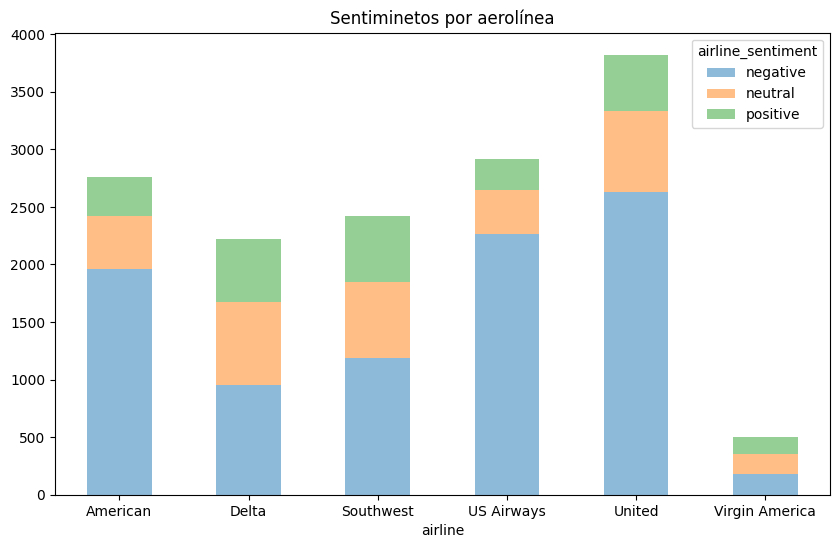

In [ ]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [ ]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 1
#Ajuste de los datos de entrenamiento con la función CountVectorizer
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)

#Transformación datos de Test
X_test_dtm = vect.transform(X_test)

In [ ]:
#Entrenamiento del modelo Random Forest
rfc = RandomForestClassifier(random_state= 1)
rfc.fit(X_train_dtm, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
#Evaluamos desempeño del modelo
y_pred = rfc.predict(X_test_dtm)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7725579470198676


con base en los resultados obtenidos, podemos decir que el modelo de Random Forest Classifier, entrenado en el conjunto de datos ajustados con Countvectorizer, es capaz de predecir con un 77.255% de precisión el sentimiento asociado a cada tweet. Este nivel de precisión indica que el modelo puede ser considerado como una herramienta útil para la clasificación de los sentimientos en Twitter relacionados con las aerolíneas de EE.UU.

Es importante tener en cuenta que el CountVectorizer utilizado para ajustar los datos, por lo que sería recomendable explorar otros métodos de procesamiento de texto y vectorización de datos para mejorar aún más la precisión del modelo. 

### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 2
#Ajuste de los datos de entrenamiento con la función CountVectorizer
vect_no_stopw = CountVectorizer(stop_words='english')
X_train_dtm2 = vect_no_stopw.fit_transform(X_train)

#Transformación datos de Test
X_test_dtm2 = vect_no_stopw.transform(X_test)

#Entrenamiento del modelo Random Forest
rfc2 = RandomForestClassifier(random_state= 1)
rfc2.fit(X_train_dtm2, y_train)

#Evaluamos desempeño del modelo
y_pred2 = rfc2.predict(X_test_dtm2)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy2)

Accuracy: 0.7667632450331126


con base en los resultados obtenidos, podemos decir que el modelo de Random Forest Classifier, entrenado en el conjunto de datos ajustados con Countvectorizer, y, adicionalmente agregando un hiperparámetro a countvectirizer con el fin de eliminar los stopwords, representa una disminución de la mejoría  del performance del modelo con respecto al modelo anterior, obteniendo un accuracy de 0.7667 vs 0.7725 obtenido en el modelo anterior, de decir, el modelo es capaz de predecir con un 76.67% de precisión el sentimiento asociado a cada tweet. Este nivel de precisión indica que el modelo puede ser considerado como una herramienta útil para la clasificación de los sentimientos en Twitter relacionados con las aerolíneas de EE.UU, sin embargo, es preferible el modelo anterior ya que el accuracy es mayor.

### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:

vect = CountVectorizer()
vect.fit_transform(X_train)
words = list(vect.vocabulary_.keys())[:100]

In [ ]:
print([wordnet_lemmatizer.lemmatize(word) for word in words])

['jetblue', 'of', 'course', 'am', 'americanair', 'complt', 'incompetence', 'on', 'flt', '295', 'lav', 'delay', 'from', 'pln', 'that', 'lnded', 'last', 'nite', 'no', 'internet', 'and', 'poor', 'svc', 'not', 'what', 'expect', 'southwestair', 'flight', '4968', 'n8325d', 'departs', 'mco', 'enroute', 'to', 'no_airport', 'http', 'co', 'fd4snvkiem', 'usairways', 'doe', 'anyone', 'your', 'airline', 'know', 'how', 'do', 'their', 'job', 'united', 'want', 'plane', 'dad', 'my', '386', 'dallas', 'jacksonville', 'fl', 'ha', 'been', 'cancelled', 'flightled', 'one', 'notified', 'me', 'going', 'it', 'is', 'trying', 'make', 'but', 'probably', 'too', 'late', 'did', 'see', 'an', 'email', 'could', 'call', 'pittsburgh', 'international', 'always', 'look', 'forward', 'jb', 'rt', 'bostongarden', 'looking', 'welcoming', 'you', 'onboard', 'have', 'the', 'ability', 'switch', 'cannot', 'tell', 'where', 'bag', 'are']


In [ ]:
print([wordnet_lemmatizer.lemmatize(word,pos='v') for word in words])

['jetblue', 'of', 'course', 'be', 'americanair', 'complt', 'incompetence', 'on', 'flt', '295', 'lav', 'delay', 'from', 'pln', 'that', 'lnded', 'last', 'nite', 'no', 'internet', 'and', 'poor', 'svc', 'not', 'what', 'expect', 'southwestair', 'flight', '4968', 'n8325d', 'depart', 'mco', 'enroute', 'to', 'no_airport', 'http', 'co', 'fd4snvkiem', 'usairways', 'do', 'anyone', 'your', 'airline', 'know', 'how', 'do', 'their', 'job', 'unite', 'want', 'plane', 'dad', 'my', '386', 'dallas', 'jacksonville', 'fl', 'have', 'be', 'cancel', 'flightled', 'one', 'notify', 'me', 'go', 'it', 'be', 'try', 'make', 'but', 'probably', 'too', 'late', 'do', 'see', 'an', 'email', 'could', 'call', 'pittsburgh', 'international', 'always', 'look', 'forward', 'jb', 'rt', 'bostongarden', 'look', 'welcome', 'you', 'onboard', 'have', 'the', 'ability', 'switch', 'cannot', 'tell', 'where', 'bag', 'be']


In [ ]:
# Celda 3
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word,pos='v') for word in words]

#Ajuste de los datos de entrenamiento con la función CountVectorizer
vectorizer_Sl = CountVectorizer(analyzer=split_into_lemmas)
X_train_dtm3 = vectorizer_Sl.fit_transform(X_train)


#Transformación datos de Test
X_test_dtm3 = vectorizer_Sl.transform(X_test)

#Entrenamiento del modelo Random Forest
rfc3 = RandomForestClassifier(random_state= 1)
rfc3.fit(X_train_dtm3, y_train)

#Evaluamos desempeño del modelo
y_pred3 = rfc3.predict(X_test_dtm3)
accuracy3 = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy3)


Accuracy: 0.7593129139072847


De a cuerdo con los resultado de la lLematización con verbos una vez corrido el modelo de Random Forest Classifier, entrenado en el conjunto de datos ajustados con Countvectorizer, ajustado a el hiperparámetro de Lematización con verbos, podemos observar que el indicador de accuaracy disminune frente a los modelos anteriores, dando como comparacion: Countvectorizer 0.7725 vs Countvectorizer+EliminacionStopWrods:0.7667 y finalmente Countvectorizer+Split_lemas 0.7595. Respecto a la interpretacion del resultado, podemos decir que el modelo es capaz de predecir con un 75.95% de precisión el sentimiento asociado a cada tweet. Si bien el modelo nos da una precision de un nivel relativamente alto para predecir los sentimientos de los tweets asociados a las aerolinias, si podemos observar que existen dos modelos con mejores posibilidades de prediccion.

### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 4

wordnet_lemmatizer = WordNetLemmatizer()

# Definición de la función que tenga como parámetro texto y devuelva una lista de lemas
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word,pos='v') for word in words]

#Ajuste de los datos de entrenamiento con la función CountVectorizer
vectorizer = CountVectorizer(stop_words='english', analyzer=split_into_lemmas)
X_train_dtm4 = vectorizer.fit_transform(X_train)

#Transformación datos de Test
X_test_dtm4 = vectorizer.transform(X_test)

#Entrenamiento del modelo Random Forest
rfc4 = RandomForestClassifier(random_state= 1)
rfc4.fit(X_train_dtm4, y_train)

#Evaluamos desempeño del modelo
y_pred4 = rfc4.predict(X_test_dtm4)
accuracy4 = accuracy_score(y_test, y_pred4)
print("Accuracy:", accuracy4)


Accuracy: 0.7593129139072847


Finalmente, al entrenar el modelo Random Forest Classifier, ajustando los datos de entrenamiento con la función countVectorizar e incluyendo como hiperparámetros la eliminación de los stopword y el uso de los lemmas asumiendo que cada palabra es un verbo, se obtiene un accuracy de 0.7593 al evaluar el desempeño del modelo. Es decir, el modelo puede predecir con un 75.93% de precisión el sentimiento asociado a cada tweet con relación a las aerolíneas de EE. UU.

### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

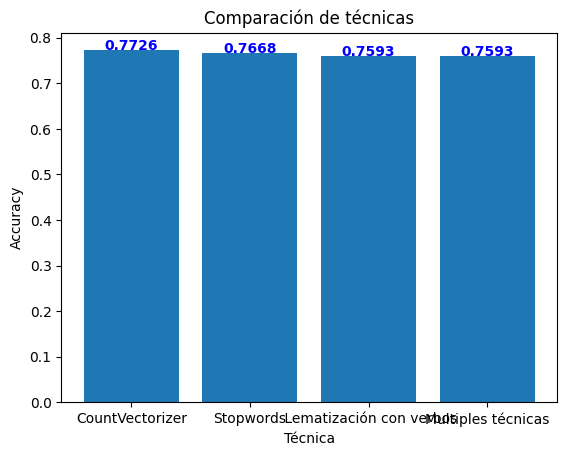

In [ ]:
import matplotlib.pyplot as plt

# Datos de la gráfica
tecnicas = ['CountVectorizer', 'Stopwords', ' Lematización con verbos', 'Multiples técnicas']
Accuracy = [accuracy, accuracy2,accuracy3, accuracy4]

# Crear la gráfica de barras
plt.bar(tecnicas, Accuracy)

# Personalizar la gráfica
plt.title('Comparación de técnicas')
plt.xlabel('Técnica')
plt.ylabel('Accuracy')


for i, v in enumerate(Accuracy):
    plt.text(i, v + 0.001, f'{v:.4f}', color='blue', fontweight='bold', ha='center')

# Mostrar la gráfica
plt.show()

Podemos observar que los modelos en general presentan resultados similares en términos de precisión, con pequeñas diferencias entre ellos. El Punto 1, que utiliza el CountVectorizer sin ninguna otra técnica de nlo, obtiene la precisión más alta con un valor de 0.772557. Sin embargo, el Punto 2, que aplica el CountVectorizer y elimina las stopwords, también obtiene un desempeño muy cercano con una precisión de 0.76676.

En el Punto 3 y Punto 4, se aplica además la lematización del texto con verbos. Sin embargo, estos modelos presentan una precisión ligeramente menor en comparación con los anteriores (0.759312 y 0.7593129 respectivamente). Esto podría indicar que en este caso particular, la lematización del texto con verbos no tiene un impacto significativo en el desempeño del modelo.

En términos de ventajas y desventajas de los modelos:

Ventajas del mejor modelo (Punto 1 - Accuracy 1: 0.772557):

Obtiene la mayor precisión entre los modelos evaluados.
Requiere menos procesamiento adicional en comparación con los otros modelos.
Es más sencillo de implementar y entender.
Desventajas del modelo con el menor desempeño (Punto 4 - Accuracy 4: 0.7593129):

Obtiene la menor precisión entre los modelos evaluados.
La lematización con verbos no parece aportar beneficios significativos en este caso específico.
Requiere más recursos computacionales debido a la lematización adicional.
En resumen, el modelo en el Punto 1, que utiliza únicamente el CountVectorizer, obtiene la mejor precisión y requiere menos procesamiento adicional. Sin embargo, la diferencia de desempeño entre los modelos es pequeña, lo que indica que en este caso particular, el CountVectorizer por sí solo es suficiente para obtener resultados competitivos en la predicción de sentimientos de tweets.